# Neural Networks & Intelligent Computer Systems | 1st Assignment
Team ΜΒ-24 | Small Dataset S12

## Section A: Our Team

<table align="left">
    <tr align="left"><th>Surname</th><th>Name</th><th>Student ID</th></tr>
    <tr><td>Korkovili</td><td>Ioanna</td><td>03115078</td></tr>
    <tr><td>Xanthi</td><td>Eleni</td><td>03115054</td></tr>
    <tr><td>Tsagkarakis</td><td>Stylianos</td><td>03115180</td></tr>
</table>

## Section B: Introduction to the dataset



**LSVT Voice Rehabilitation Data Set**

This dataset is composed of a range of biomedical speech signal processing algorithms from 14 people who have been diagnosed with Parkinson's disease undergoing LSVT (a program assisting voice rehabilitation). 

The original study used 309 algorithms to characterize 126 speech signals from 14 people, a robust feature selection mechanism to determine the most parsimonious feature subset, and Support Vector Machines (SVM) and Random Forests (RF) to predict the binary response (acceptable vs unacceptable phonation during rehabilitation). Both cross-validation (10-fold cross validation with 100 repetitions for statistical confidence) and leave one subject out methods were used for the validation of the findings. In both cases we denostrated a near 90% accurate replication of the clinicians' assessment.






### Upgrade hosted runtime

In [35]:
!pip install --upgrade pip           #upgrade pip package installer
!pip install --upgrade scikit-learn  #upgrade scikit-learn package
!pip install --upgrade numpy         #upgrade numpy package
!pip install --upgrade pandas        #upgrade #upgrade pandas package
!pip install --upgrade joblib
!pip install --upgrade imbalanced-learn

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)
Requirement already up-to-date: joblib in /usr/local/lib/python3.6/dist-packages (0.14.1)
Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.6.1)


### Retrieve dataset

In [36]:
import pandas as pd
import numpy as np
import ast
import io
import requests
import matplotlib.pyplot as plt
from urllib.error import HTTPError

# responsefile = "lsvt_binary_response.csv"
# datafile = "lsvt_data.csv"
# demographicsfile = "lsvt_demographics.csv"

try:
    #data without headers for better manipulation
    binary_csv_url = "https://raw.githubusercontent.com/steliostss/neural_networks_ntua/master/ex1/lsvt_binary_response.csv?token=AH57CIKFAWBUCP4KSDDKT4C576IO6"
    binary_response = pd.read_csv(binary_csv_url, header=None)

    # data_csv_url = "https://raw.githubusercontent.com/steliostss/neural_networks_ntua/master/ex1/lsvt_data_2.csv?token=AH57CINQWC5N4TIH7QQGZXC5753RE"
    data_csv_url = "https://raw.githubusercontent.com/steliostss/neural_networks_ntua/master/ex1/lsvt_data.csv?token=AH57CIN4KNS65U7AGYDJX5K576HEE"
    data = pd.read_csv(data_csv_url, header=None)

    demographics_csv_url = "https://raw.githubusercontent.com/steliostss/neural_networks_ntua/master/ex1/lsvt_demographics.csv?token=AH57CIJAK62CQJZTPBS22JK57475Q"
    demographics = pd.read_csv(demographics_csv_url, header=None)

    #data with headers for better visualizing
    demographics_headers = pd.read_csv(demographics_csv_url)
    data_headers = pd.read_csv(data_csv_url)
    binary_response_headers = pd.read_csv(binary_csv_url)

    print("Succesful file processing!")

except HTTPError:
    print("URL not working.")


Succesful file processing!


### Printing for validation / visualization

In [37]:
#print for better visualization
data_headers.head(3)

,Jitter->F0_abs_dif,Jitter->F0_dif_percent,Jitter->F0_PQ5_classical_Schoentgen,Jitter->F0_PQ5_classical_Baken,Jitter->F0_PQ5_generalised_Schoentgen,Jitter->F0_abs0th_perturb,Jitter->F0_CV,Jitter->F0_TKEO_mean,Jitter->F0_TKEO_std,Jitter->F0_TKEO_prc5,Jitter->F0_TKEO_prc25,Jitter->F0_TKEO_prc75,Jitter->F0_TKEO_prc95,Jitter->F0_FM,Jitter->F0range_5_95_perc,Jitter->pitch_abs,Jitter->pitch_percent,Jitter->pitch_PQ5_classical_Schoentgen,Jitter->pitch_PQ5_classical_Baken,Jitter->pitch_PQ5_generalised_Schoentgen,Jitter->pitch_abs0th_perturb,Jitter->pitch_CV,Jitter->pitch_TKEO_mean,Jitter->pitch_TKEO_std,Jitter->pitch_TKEO_prc5,Jitter->pitch_TKEO_prc25,Jitter->pitch_TKEO_prc75,Jitter->pitch_TKEO_prc95,Jitter->pitch_FM,Jitter->pitch_range_5_95_perc,Shimmer->Ampl_abs_dif,Shimmer->Ampl_dif_percent,Shimmer->Ampl_PQ3_classical_Schoentgen,Shimmer->Ampl_PQ3_classical_Baken,Shimmer->Ampl_PQ3_generalised_Schoentgen,Shimmer->Ampl_PQ5_classical_Schoentgen,Shimmer->Ampl_PQ5_classical_Baken,Shimmer->Ampl_PQ5_generalised_Schoentgen,Shimmer->Ampl_PQ11_classical_Schoentgen,Shimmer->Ampl_PQ11_classical_Baken,...,entropy_shannon4_1_coef,entropy_shannon4_2_coef,entropy_shannon4_3_coef,entropy_shannon4_4_coef,entropy_shannon4_5_coef,entropy_shannon4_6_coef,entropy_shannon4_7_coef,entropy_shannon4_8_coef,entropy_shannon4_9_coef,entropy_shannon4_10_coef,entropy_log4_1_coef,entropy_log4_2_coef,entropy_log4_3_coef,entropy_log4_4_coef,entropy_log4_5_coef,entropy_log4_6_coef,entropy_log4_7_coef,entropy_log4_8_coef,entropy_log4_9_coef,entropy_log4_10_coef,det_TKEO_mean4_1_coef,det_TKEO_mean4_2_coef,det_TKEO_mean4_3_coef,det_TKEO_mean4_4_coef,det_TKEO_mean4_5_coef,det_TKEO_mean4_6_coef,det_TKEO_mean4_7_coef,det_TKEO_mean4_8_coef,det_TKEO_mean4_9_coef,det_TKEO_mean4_10_coef,det_TKEO_std4_1_coef,det_TKEO_std4_2_coef,det_TKEO_std4_3_coef,det_TKEO_std4_4_coef,det_TKEO_std4_5_coef,det_TKEO_std4_6_coef,det_TKEO_std4_7_coef,det_TKEO_std4_8_coef,det_TKEO_std4_9_coef,det_TKEO_std4_10_coef
0,0.088112,0.041697,0.000480,-3.723304e-06,0.000422,2.458381,6.332164e-07,47.021079,1366.430390,-7.103323,-2.687924,-0.035674,2.849068,0.042287,9.116401,0.000002,0.041920,0.000482,4.354061e-06,0.000440,0.000055,6.856367e-07,2.536591e-08,7.412680e-07,-3.524844e-09,-1.382237e-09,0.000000e+00,1.367104e-09,0.042287,0.000204,0.069838,11.566415,0.077160,-0.000064,0.081880,0.092070,-0.000057,0.081880,0.100744,0.000057,...,-233661.1245,-277726.2665,-327634.1744,-390417.4249,-481323.9141,-633245.6446,-9.018569e+05,-1.433921e+06,-2528415.988,-4819157.284,4076.864063,2422.969509,1429.320757,851.745520,525.181116,345.610973,246.183529,195.776526,172.652511,164.557388,0.112549,0.443874,1.728619,6.539524,23.606344,79.049121,242.544297,661.679929,1618.318338,3643.234312,2.527583,7.088978,19.753255,54.335046,145.528630,375.097397,921.296579,2137.079844,4697.131077,9931.208257
1,0.161798,0.057364,0.000677,5.466365e-06,0.000206,2.592066,7.228518e-07,93.557936,2582.922776,-23.284761,-7.533801,-0.347630,7.457385,0.042783,11.568865,0.000002,0.057055,0.000673,-5.419147e-06,0.000205,0.000033,7.013483e-07,1.408057e-08,3.872420e-07,-3.561551e-09,-1.164851e-09,0.000000e+00,1.195081e-09,0.042783,0.000146,0.047107,7.202769,0.047907,0.000110,0.055919,0.052175,0.000542,0.055919,0.072145,0.000223,...,-266292.2262,-315357.3478,-371033.9862,-441256.8092,-543227.8848,-713976.6286,-1.015830e+06,-1.613896e+06,-2843879.522,-5416842.350,4182.699168,2476.698050,1456.995087,866.391724,533.314567,350.486711,249.368427,198.116666,174.570294,166.263182,0.126734,0.499301,1.941236,7.344723,26.518497,88.784513,272.216266,742.338942,1814.494579,4082.136146,2.841881,7.977363,22.203504,60.993338,163.560972,421.010306,1036.092589,2404.072562,5284.082128,11165.095660
2,0.554508,0.642913,0.007576,-7.443871e-07,0.006488,12.691326,6.946246e-04,52.988422,466.682635,-45.308680,-5.175259,-0.359585,4.549093,0.471729,39.079991,0.000067,0.563163,0.006659,7.576645e-07,0.004372,0.001604,2.103274e-04,6.191656e-07,4.898115e-06,-8.230807e-07,-9.233181

In [38]:
#print for better visualization
demographics_headers.head(3)

,Subject_index,Age,"Gender, 0->Male, 1->Female"
0,1,68,1
1,1,68,1
2,1,68,1


In [39]:
#print for better visualization
binary_response_headers.head(3)

,1
0,2
1,2
2,1


### Custom functions

In [0]:
## GATHER ALL FUNCTIONS FOR SECTION-B HERE

# evaluate type of value in the given variable
def tryeval(np_samples):
    for row in range(len(np_samples)): 
        for col in range(len(np_samples[row])):
            try: 
                np_samples[row][col] = ast.literal_eval(np_samples[row][col])
            except ValueError:
                pass
    return np_samples

def tryeval1D(np_samples):
    for row in range(len(np_samples)): 
        try: 
            np_samples[row] = ast.literal_eval(np_samples[row])
        except ValueError:
            pass
    return np_samples

# define if all features have the same type
def features_datatypes(features):
    datatypes = list()
    for row in range(len(features)):
        for col in range(len(features[row])):
            current_type = type(features[row][col])
            if current_type not in datatypes:
                datatypes.append(current_type)

    return datatypes
# define all class labels
def class_labels(labels):
    cLabels = list()
    for col in range(len(labels)):
        current_val = labels[col]
        if current_val not in cLabels:
            cLabels.append(current_val)
    return cLabels

### Manage datafile, get desired data

Get #features, #samples, type of features

In [41]:
# gather data features in a table
data_features = data.iloc[[0],0:]
( _ , number_of_features ) = data_features.shape
print("Q2: Number of features = ", number_of_features)
# print(data_features.shape) # uncomment if you want to check the results

# gather data samples in a table
data_samples = data.iloc[1:,0:]
( number_of_samples , _ ) = data_samples.shape
print("Q2: Number of samples = ", number_of_samples)
# print(data_samples.shape) # uncomment if you want to check the results

# transform the gathered data in numpy arrays
np_features = data_features.values
np_samples = data_samples.values

# # convert the type of samples to the correct type
np_samples = tryeval(np_samples)
datatypes = features_datatypes(np_samples)

print("Q2: Type of features =", end=' ')
print(*datatypes, sep=' & ')

Q2: Number of features =  310
Q2: Number of samples =  126
Q2: Type of features = <class 'float'> & <class 'int'>


- Q3: There are headers in the first line

- Q3: There is no line numbering

In [42]:
# gather class labels in a table
binary_class_labels = binary_response.iloc[0:,:] 
np_labels_temp = binary_class_labels.values.flatten()

np_labels = list()
for item in np_labels_temp:
    np_labels.append(item)

np_labels = np.array(np_labels)

np_labels = tryeval1D(np_labels)

np_labels

array([1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2])

### Classification Labels

In [43]:
# make a list with all different labels
list_of_labels = class_labels(np_labels)
print("Q4: Classification Labels =", end=' ')
print(*list_of_labels, sep = " & ")

label_names = list()
for i in range(len(list_of_labels)):
    label_names.append(str(list_of_labels[i]))
# label_names = ('1','2')
label_names

Q4: Classification Labels = 1 & 2


['1', '2']

### Modifications on the datafile
- Q5: There were some modifications on the data. 
    - We replaced **" , "** with **" . "**
    - We removed the headers on the binary response file.
    

### Check Empty dataset

In [44]:
# check if dataset has empty values
# and if, how many of them
!ls
!echo "For binary_response file, empty values: "
!cat lsvt_binary_response.csv | grep "?" | wc -l
!echo "For data file, empty values: "
!cat lsvt_data.csv | grep "?" | wc -l
!echo "For demographics file, empty values: "
!cat lsvt_demographics.csv | grep "?" | wc -l

sample_data
For binary_response file, empty values: 
cat: lsvt_binary_response.csv: No such file or directory
0
For data file, empty values: 
cat: lsvt_data.csv: No such file or directory
0
For demographics file, empty values: 
cat: lsvt_demographics.csv: No such file or directory
0


### Label frequencies

In [45]:
print("frequencies:", np.bincount(np_labels))
freq = np.bincount(np_labels)
for i in range(len(freq)):
    if i == 0: continue
    print("For label:", i, "percentage is", "{:.2%}".format(freq[i]/number_of_samples))

frequencies: [ 0 42 84]
For label: 1 percentage is 33.33%
For label: 2 percentage is 66.67%


Το παραπάνω dataset όπως φαίνεται από τις συχνότητες δεν είναι ισορροπημένο.
Καθώς το δείγμα είναι μικρό επιλέγουμε να κανουμε oversampling για να μη χάσουμε κρίσιμη πληροφορία. 

### Split to test and train set

After spliting, we oversample the train set to be balanced

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 

In [47]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(np_samples, 
                                                          np_labels, 
                                                          test_size=0.2)

# sampler = SMOTE()
# train, train_labels = sampler.fit_sample(np_samples, np_labels)

train_set_length = len(train)
# print length of train set to validate oversampling
print("#samples in train set =", train_set_length, '\n')

#samples in train set = 100 



**Q8**: Our samples are **ordered tuples** since each number corresponds to a specific attribute.

## Section C: Baseline Classification

### Custom functions

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

def print_precision_recall_fscore_support(method, test_labels, pred, label_names):
    print(method, end = '\n\n')
    (none, micro, macro, weighted) = get_PRFS(method, test_labels, pred, label_names)
    # εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
    # το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση 1 και το δεύτερο η κλάσση 2
    print("none     :", none )
    # εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
    print("micro    :", micro )
    # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
    print("macro    :", macro )
    # εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας. Με average = weighted κάθε κλάση μετρά στο μέσο όρο ανάλογα με το support της.
    print("weighted :", weighted, end = '\n\n')
    # η classification_report τυπώνει πιο ωραία οπτικά σε string τα αποτελέσματα
    # πρώτα για κάθε κλάση και μετά με μέσους όρους
    print(classification_report(test_labels, pred, target_names=label_names), end = '\n\n')

    ( _ , _ , microF1    , _ ) = micro
    ( _ , _ , macroF1    , _ ) = macro
    ( _ , _ , weightedF1 , _ ) = weighted

    barplotF1 = (microF1, macroF1, weightedF1)
    xaxis = ("microF1", "macroF1", "weightedF1")
    plt.figure(figsize=(10,5))
    plt.bar(xaxis, barplotF1)
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------", end = '\n')
    print("---------------------------------------------------------------------------------------------------------------------", end = '\n\n')

# get_precision_recall_fscore_support
def get_PRFS(method, test_labels, pred, label_names):
    none = precision_recall_fscore_support(test_labels, pred, average=None)
    micro = precision_recall_fscore_support(test_labels, pred, average='micro')
    macro = precision_recall_fscore_support(test_labels, pred, average='macro')
    weighted = precision_recall_fscore_support(test_labels, pred, average='weighted')
    return (none, micro, macro, weighted)

### Dummy Classifier

In [0]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")


In [50]:
# με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
from sklearn.metrics import accuracy_score

# με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
predictions = {}
lsvt_accuracy = {}

model = dc_uniform.fit(train, train_labels)
preds = dc_uniform.predict(test)
predictions['dc_uniform'] = preds
lsvt_accuracy['uniform (random)'] = accuracy_score(test_labels, preds)


model = dc_constant_1.fit(train, train_labels)
preds = dc_constant_1.predict(test)
predictions['dc_constant_1'] = preds
lsvt_accuracy['constant 1'] = accuracy_score(test_labels, preds)

model = dc_constant_2.fit(train, train_labels)
preds = dc_constant_2.predict(test)
predictions['dc_constant_2'] = preds
lsvt_accuracy['constant 2'] = accuracy_score(test_labels, preds)

model = dc_most_frequent.fit(train, train_labels)
preds = dc_most_frequent.predict(test)
predictions['dc_most_frequent'] = preds
lsvt_accuracy['most frequent label'] = accuracy_score(test_labels, preds)

model = dc_stratified.fit(train, train_labels)
preds = dc_stratified.predict(test)
predictions['dc_stratified'] = preds
lsvt_accuracy['stratified'] = accuracy_score(test_labels, preds)

for i in predictions:
    print("Prediction for", i, '=', predictions[i])

print()
    
print("Classification Accuracy on the LSVT Voice Rehabilitation Dataset (20% test set)\n")
sorted_accuracy = [(k, lsvt_accuracy[k]) for k in sorted(lsvt_accuracy, key=lsvt_accuracy.get, reverse=True)]

print("----------Results are sorted----------")
print("** Strategy (score, accuracy_score) **\n")
for k,v in sorted_accuracy:
    print(k,v)


Prediction for dc_uniform = [1 1 2 2 1 1 2 2 1 2 2 1 2 2 2 1 1 2 1 2 2 1 2 1 1 1]
Prediction for dc_constant_1 = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Prediction for dc_constant_2 = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Prediction for dc_most_frequent = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Prediction for dc_stratified = [2 1 1 2 2 2 1 1 2 1 2 2 2 1 1 1 2 2 2 1 2 2 2 2 1 2]

Classification Accuracy on the LSVT Voice Rehabilitation Dataset (20% test set)

----------Results are sorted----------
** Strategy (score, accuracy_score) **

constant 2 0.6538461538461539
most frequent label 0.6538461538461539
stratified 0.5
uniform (random) 0.46153846153846156
constant 1 0.34615384615384615


In [51]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix

print("Confusion matrices\n")
for i in predictions:
    # τυπώνουμε το confusion matrix
    cnf_matrix = confusion_matrix(test_labels, predictions[i])
    print(i)
    print(cnf_matrix, end='\n\n')

Confusion matrices

dc_uniform
[[4 5]
 [9 8]]

dc_constant_1
[[ 9  0]
 [17  0]]

dc_constant_2
[[ 0  9]
 [ 0 17]]

dc_most_frequent
[[ 0  9]
 [ 0 17]]

dc_stratified
[[ 3  6]
 [ 7 10]]



dc_uniform

none     : (array([0.30769231, 0.61538462]), array([0.44444444, 0.47058824]), array([0.36363636, 0.53333333]), array([ 9, 17]))
micro    : (0.46153846153846156, 0.46153846153846156, 0.46153846153846156, None)
macro    : (0.46153846153846156, 0.45751633986928103, 0.4484848484848485, None)
weighted : (0.5088757396449703, 0.46153846153846156, 0.4745920745920746, None)

              precision    recall  f1-score   support

           1       0.31      0.44      0.36         9
           2       0.62      0.47      0.53        17

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.45        26
weighted avg       0.51      0.46      0.47        26




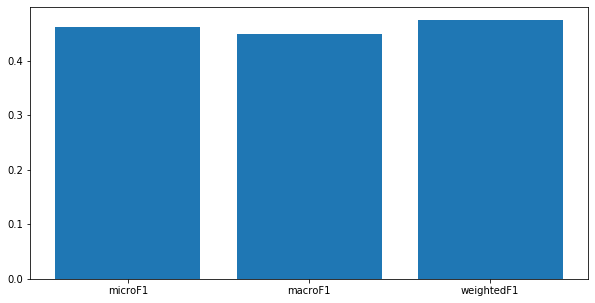

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_constant_1

none     : (array([0.34615385, 0.        ]), array([1., 0.]), array([0.51428571, 0.        ]), array([ 9, 17]))
micro    : (0.34615384615384615, 0.34615384615384615, 0.34615384615384615, None)
macro    : (0.17307692307692307, 0.5, 0.2571428571428571, None)
weighted : (0.11982248520710059, 0.34615384615384615, 0.178021978021978, None)

              precision    recall  f1-score   support

           1       0.35      1.00      0.51         9
           2       0.00      0.00      0.00        17

    accuracy                           0.35        26
   macro avg       0.17      0.50      0.26        26
weighted avg       0.12      0.35      0.18        26




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


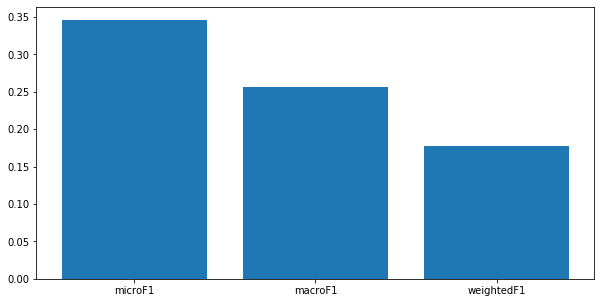

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_constant_2

none     : (array([0.        , 0.65384615]), array([0., 1.]), array([0.        , 0.79069767]), array([ 9, 17]))
micro    : (0.6538461538461539, 0.6538461538461539, 0.6538461538461539, None)
macro    : (0.3269230769230769, 0.5, 0.39534883720930236, None)
weighted : (0.42751479289940825, 0.6538461538461539, 0.5169946332737031, None)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.65      1.00      0.79        17

    accuracy                           0.65        26
   macro avg       0.33      0.50      0.40        26
weighted avg       0.43      0.65      0.52        26




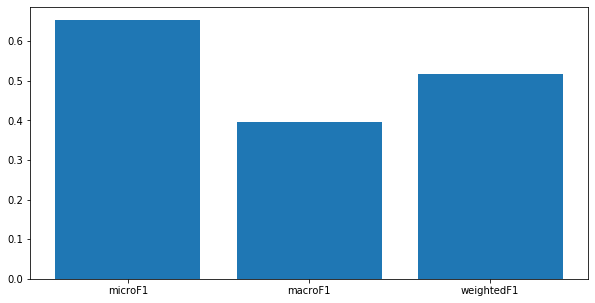

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_most_frequent

none     : (array([0.        , 0.65384615]), array([0., 1.]), array([0.        , 0.79069767]), array([ 9, 17]))
micro    : (0.6538461538461539, 0.6538461538461539, 0.6538461538461539, None)
macro    : (0.3269230769230769, 0.5, 0.39534883720930236, None)
weighted : (0.42751479289940825, 0.6538461538461539, 0.5169946332737031, None)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.65      1.00      0.79        17

    accuracy                           0.65        26
   macro avg       0.33      0.50      0.40        26
weighted avg       0.43      0.65      0.52        26




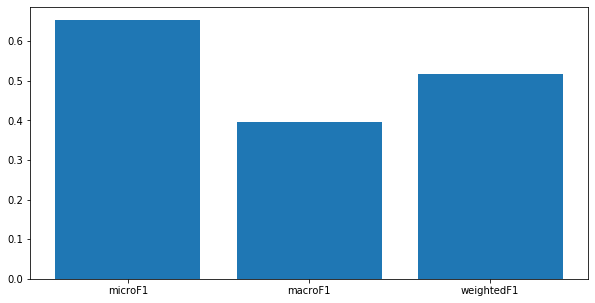

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_stratified

none     : (array([0.3  , 0.625]), array([0.33333333, 0.58823529]), array([0.31578947, 0.60606061]), array([ 9, 17]))
micro    : (0.5, 0.5, 0.5, None)
macro    : (0.4625, 0.4607843137254902, 0.4609250398724083, None)
weighted : (0.5125, 0.5, 0.5055821371610846, None)

              precision    recall  f1-score   support

           1       0.30      0.33      0.32         9
           2       0.62      0.59      0.61        17

    accuracy                           0.50        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.51      0.50      0.51        26




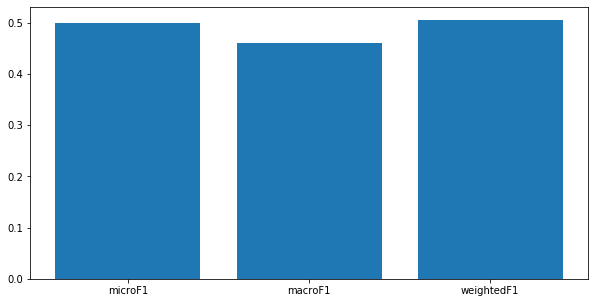

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [52]:
for i in predictions:
    print_precision_recall_fscore_support(i, test_labels, predictions[i], label_names)

##### Comments on the diagrams
- Among the Dummy Classifiers, it is visible that the best strategy is 'constant 2' since class 2 is the most frequent one. That is why it matches with the 'dc_most_frequent' Moreover, if we run the classification multiple times, we notice that 'stratified' strategy results in better accuracy more often than the 'uniform' strategy. This is because our dataset is not balanced and 'stratified' is more effiecient than the random strategy.

### k Nearest Neighbors Classifier (kNN)

kNN Confusion matrix:

 [[ 7  2]
 [ 7 10]] 

KNeighborsClassifier

none     : (array([0.5       , 0.83333333]), array([0.77777778, 0.58823529]), array([0.60869565, 0.68965517]), array([ 9, 17]))
micro    : (0.6538461538461539, 0.6538461538461539, 0.6538461538461539, None)
macro    : (0.6666666666666667, 0.6830065359477124, 0.6491754122938531, None)
weighted : (0.717948717948718, 0.6538461538461539, 0.6616307230999886, None)

              precision    recall  f1-score   support

           1       0.50      0.78      0.61         9
           2       0.83      0.59      0.69        17

    accuracy                           0.65        26
   macro avg       0.67      0.68      0.65        26
weighted avg       0.72      0.65      0.66        26




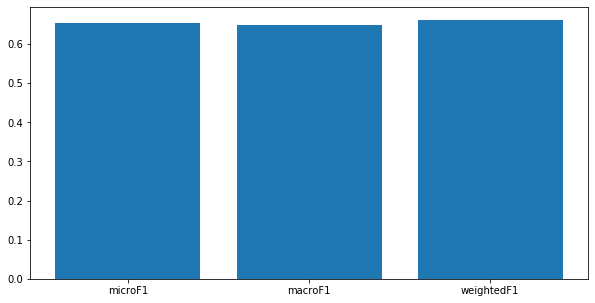

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(train, train_labels)

pred = knn.predict(test)

cnf_matrix = confusion_matrix(test_labels, pred)

print("kNN Confusion matrix:\n\n", cnf_matrix, '\n')

print_precision_recall_fscore_support("KNeighborsClassifier", test_labels, pred, label_names)


#### Comments on the diagrams
- We see that kNN did manage to guess the whole class '1' and around half of the class '2', that's why it reaches a weighted average of 75%, better than the Dummy's results.

## Section D: Optimizing Classifiers

### Split to Training/Test Set

In [0]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(np_samples, 
                                                          np_labels, 
                                                          test_size=0.2)

### Balance Dataset - Oversampling

In [55]:
sampler = SMOTE()
train, train_labels = sampler.fit_sample(np_samples, np_labels)

train_set_length = len(train)
# print length of train set to validate oversampling
print("#samples in train set =", train_set_length, '\n')

#samples in train set = 168 



### Pre-Processing

#### Selection - Variance Threshold

In [56]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.5)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
test_reduced = test[:,mask]

selector = None
selector = VarianceThreshold(threshold=15000)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced_20k = selector.fit_transform(train)
mask = selector.get_support()
test_reduced_20k = test[:,mask]

print("0.5", train_reduced.shape)
print("0.5", test_reduced.shape)
print("20000", train_reduced_20k.shape)
print("20000", test_reduced_20k.shape)
print(train_labels.shape)

0.5 (168, 180)
0.5 (26, 180)
20000 (168, 93)
20000 (26, 93)
(168,)


#### Standardization

In [0]:
from sklearn import preprocessing

# όριζουμε ένα αντικείμενο scaler και το κάνουμε fit στο train set
scaler = preprocessing.StandardScaler().fit(train)
# standardization των features του training set
train_scaled = scaler.transform(train)
# εφαρμόζουμε τον scaler στα δεδομένα test
test_scaled = scaler.transform(test)

### Hyperparameter Optimization
Custom GridsearchCV

In [0]:
def make_tuples(arr):
    results = list()
    for i in range(0, len(arr), 2):
        results.append((arr[i], arr[i+1]))
    return results

def _gridsearch(test_set, test_set_labels, train_set, train_set_labels, KMAX, label_names):
    # test every value for k
    # append the result to a list
    # sort the list
    # return the list and keep the best
    gridsearch_results = list()

    for i in range(1, KMAX):
        method = "KNeighborsClassifier"
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_set, train_set_labels)
        pred = knn.predict(test_set)
        accuracy = accuracy_score(test_set_labels, pred)

        gridsearch_results.extend( (accuracy, i) )

    return gridsearch_results

def get_next_fold(_splitted_train, _train_labels, iter):
    counter = 0
    total_size = 0
    first_time = True
    for ( _data , _labels ) in zip(_splitted_train, _train_labels):
        if ( counter == iter ): # if current fold is test fold
            __test = _data
            __test_labels = _labels
        elif ( first_time ): # initialize train and train_labels
            __train = _data
            __train_labels = _labels
            first_time = False
        else: # everything else is the train fold
            __train = np.concatenate((__train, _data), axis=0)
            __train_labels = np.concatenate((__train_labels, _labels), axis=0)
        counter += 1
    return( __test, __test_labels, __train, __train_labels )


def _Kfold_cv(_train, _train_labels, _label_names, _folds=10):
    # split the train set and labels in 10 parts 
    split_train = np.array_split(_train, _folds)
    split_labels = np.array_split(_train_labels, _folds)

    # for i in range(_folds):
    #     print (len(split_train[i]), ",", len(split_labels[i]))
    knn_results = list()
    # print(KMAX)

    for iter in range(_folds):
        KMAX = len(split_train[iter]) # because there is no reason to search for more neighbors if they do no exist

        # do every possible fold out of 10
        (test_set, test_set_labels, train_set, train_set_labels) = get_next_fold(split_train, split_labels, iter)
    
        # and test every k for kNN and save results
        fold_results = _gridsearch(test_set, test_set_labels, train_set, train_set_labels, KMAX, _label_names)
        knn_results.extend((fold_results))

    return knn_results


### Final Classification - Regression Model

In [59]:

# print(test_labels)
# print(len(train), len(train_labels), len(label_names))

# classic dataset
results = _Kfold_cv(train, train_labels, label_names)
results = make_tuples(results)
results = sorted(results, key=lambda x:x[0], reverse=True)

#reduced with variance threshold = 0.5 
results_reduced = _Kfold_cv(train_reduced, train_labels, label_names)
results_reduced = make_tuples(results_reduced)
results_reduced = sorted(results_reduced, key=lambda x:x[0], reverse=True)

#reduced with variance threshold = 20000 
results_reduced_20k = _Kfold_cv(train_reduced_20k, train_labels, label_names)
results_reduced_20k = make_tuples(results_reduced_20k)
results_reduced_20k = sorted(results_reduced_20k, key=lambda x:x[0], reverse=True)

best_k = results[0][1]
best_k_reduced = results_reduced[0][1]
best_k_reduced_20k = results_reduced_20k[0][1]
print("Initial trainset, bestK = ", best_k)
print("Variance = 0.5 trainset, bestK = ", best_k_reduced)
print("Variance = 20000  trainset, bestK = ", best_k_reduced_20k)

#reduced with variance threshold = 20000 
results_scaled = _Kfold_cv(train_scaled, train_labels, label_names)
results_scaled = make_tuples(results_scaled)
results_scaled = sorted(results_scaled, key=lambda x:x[0], reverse=True)

best_k_scaled = results_scaled[0][1]
print("Scaling trainset, bestK = ", best_k_scaled)

Initial trainset, bestK =  2
Variance = 0.5 trainset, bestK =  2
Variance = 20000  trainset, bestK =  2
Scaling trainset, bestK =  1


In [0]:
def knn_fit_predict_print(_classifier, _train, _train_labels, _test, _test_labels, _label_names):
    _classifier.fit(_train, _train_labels)
    pred = _classifier.predict(_test)
    accuracy = accuracy_score(_test_labels, pred)
    print(accuracy) 
    # print_precision_recall_fscore_support("kNearestNeighbors", _test_labels, pred, _label_names)

### Print results

In [61]:
knn = None
print("Initial Variance")
knn = KNeighborsClassifier(n_neighbors = best_k)
print("accuracy = ", end=" ")
knn_fit_predict_print(knn, train, train_labels, test, test_labels, label_names)

print("\nVariance Threshold = 0.5")
knn = None
knn = KNeighborsClassifier(n_neighbors = best_k_reduced)
print("accuracy = ", end=" ")
knn_fit_predict_print(knn, train_reduced, train_labels, test_reduced, test_labels, label_names)

print("\nVariance Threshold = 20000")
knn = None
knn = KNeighborsClassifier(n_neighbors = best_k_reduced_20k)
print("accuracy = ", end=" ")
knn_fit_predict_print(knn, train_reduced_20k, train_labels, test_reduced_20k, test_labels, label_names)

print("\nScaled Trainset")
knn = None
knn = KNeighborsClassifier(n_neighbors = best_k_scaled)
print("accuracy = ", end=" ")
knn_fit_predict_print(knn, train_scaled, train_labels, test_scaled, test_labels, label_names)


Initial Variance
accuracy =  0.6538461538461539

Variance Threshold = 0.5
accuracy =  0.6538461538461539

Variance Threshold = 20000
accuracy =  0.6538461538461539

Scaled Trainset
accuracy =  1.0


#### Comments on Pre-Processing results

- Variance Threshold
    - We see that there is no effect on the results of the kNN algorithm if we use pre-processing selection with VarianceThreshold Selector.
    - You can see in the above cell that we tried with different values in the range (0.1 , 20000) and the results didn't change. 
    - Our data even though it had a small ratio of $\frac{samples}{features}$, Variance Threshold didn't achieve anything. We conclude from this, that there were specific features that helped the estimator reach a conclusion fast, without needing the other features. 
- Standardization
    - It seems that scaling the data is crucial for the classification since we have 100% accuracy on the test set.

### Conclusion

Since **we achieved 100% accuracy** on the test set, there is no need to perform any more transformations on the train and test set.